support vector machine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
cols_1 = [2,3,4,6]
df = pd.read_excel('final_1.xlsx')
df_1 = pd.read_excel('123.xlsx')
final = pd.read_excel('final_1.xlsx')

In [2]:
df.groupby('Churn')
df

,Unnamed: 0,key_0,tenure,MonthlyCharges,TotalCharges,Churn,Total Services
0,0,0,1,29.85,29.85,No,1
1,1,1,34,56.95,1889.5,No,3
2,2,2,2,53.85,108.15,Yes,3
3,3,3,45,42.30,1840.75,No,3
4,4,4,2,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...
7038,7038,7038,24,84.80,1990.5,No,5
7039,7039,7039,72,103.20,7362.9,No,4
7040,7040,7040,11,29.60,346.45,No,1
7041,7041,7041,4,74.40,306.6,Yes,1


In [3]:
df_1.head()

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


In [4]:
#final = final.drop(['key_0'],axis=1)
#final = final.drop(['Unnamed:0'],axis =1)
ser = pd.Series(final['TotalCharges']).head(10)
final.replace("Yes", "1",inplace = True) 
final.replace("No","0",inplace = True)
final.head()

,Unnamed: 0,key_0,tenure,MonthlyCharges,TotalCharges,Churn,Total Services
0,0,0,1,29.85,29.85,0,1
1,1,1,34,56.95,1889.5,0,3
2,2,2,2,53.85,108.15,1,3
3,3,3,45,42.30,1840.75,0,3
4,4,4,2,70.70,151.65,1,1


In [5]:
pd.to_numeric(ser,downcast ='signed')
final.groupby('Churn').size()

Churn
0    5174
1    1869
dtype: int64

In [6]:
final.dtypes

Unnamed: 0          int64
key_0               int64
tenure              int64
MonthlyCharges    float64
TotalCharges       object
Churn              object
Total Services      int64
dtype: object

In [7]:
final.head()

,Unnamed: 0,key_0,tenure,MonthlyCharges,TotalCharges,Churn,Total Services
0,0,0,1,29.85,29.85,0,1
1,1,1,34,56.95,1889.5,0,3
2,2,2,2,53.85,108.15,1,3
3,3,3,45,42.30,1840.75,0,3
4,4,4,2,70.70,151.65,1,1


In [8]:
final.describe()
final_1 = final.drop(['Unnamed: 0','key_0'],axis =1)
final_1

,tenure,MonthlyCharges,TotalCharges,Churn,Total Services
0,1,29.85,29.85,0,1
1,34,56.95,1889.5,0,3
2,2,53.85,108.15,1,3
3,45,42.30,1840.75,0,3
4,2,70.70,151.65,1,1
...,...,...,...,...,...
7038,24,84.80,1990.5,0,5
7039,72,103.20,7362.9,0,4
7040,11,29.60,346.45,0,1
7041,4,74.40,306.6,1,1


In [9]:
a = df['tenure'].tolist()
b = df['MonthlyCharges'].tolist()
c = df_1['TotalCharges'].tolist()
d = df['Total Services'].tolist()
y_ = final['Churn'].tolist()
mean_a = np.mean(a)
mean_b = np.mean(b)
mean_c = np.mean(c)
mean_d = np.mean(d)
x = ['tenure','MonthlyCharges','TotalCharges','Total Services','Churn']
print("tenure",a)
print("MonthlyCharges",b)
print("TotalCharges",c)
print("Total Services",d)

tenure [1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 10, 21, 1, 12, 1, 58, 49, 30, 47, 1, 72, 17, 71, 2, 27, 1, 1, 72, 5, 46, 34, 11, 10, 70, 17, 63, 13, 49, 2, 2, 52, 69, 43, 15, 25, 8, 60, 18, 63, 66, 34, 72, 47, 60, 72, 18, 9, 3, 47, 31, 50, 10, 1, 52, 64, 62, 3, 56, 46, 8, 30, 45, 1, 11, 7, 42, 49, 9, 35, 48, 46, 29, 30, 1, 66, 65, 72, 12, 71, 5, 52, 25, 1, 1, 38, 66, 68, 5, 72, 32, 43, 72, 55, 52, 43, 37, 64, 3, 36, 10, 41, 27, 56, 6, 3, 7, 4, 33, 27, 72, 1, 71, 13, 25, 67, 1, 2, 43, 23, 64, 57, 1, 72, 8, 61, 64, 71, 65, 3, 1, 30, 15, 8, 7, 70, 62, 6, 14, 22, 22, 16, 10, 13, 20, 2, 53, 11, 69, 4, 72, 58, 16, 43, 2, 14, 53, 32, 34, 15, 7, 15, 61, 1, 1, 8, 33, 13, 1, 20, 3, 13, 40, 43, 6, 69, 72, 59, 20, 24, 59, 72, 1, 27, 14, 71, 13, 44, 33, 72, 1, 19, 64, 2, 1, 61, 29, 23, 57, 72, 66, 65, 8, 4, 71, 1, 4, 12, 24, 31, 1, 30, 47, 54, 50, 1, 72, 29, 2, 10, 18, 11, 16, 72, 72, 41, 65, 13, 4, 41, 15, 1, 42, 51, 2, 1, 32, 10, 67, 61, 50, 2, 29, 3, 13, 57, 31, 45, 6

In [10]:
print("tenure" ,a/mean_a)

tenure [0.03089171 1.050318   0.06178341 ... 0.33980876 0.12356682 2.03885258]


In [11]:
print("MonthlyCharges",b/mean_c)

MonthlyCharges [0.01307318 0.02494197 0.02358428 ... 0.01296369 0.03258441 0.04627074]


In [12]:
print("TotalCharges",c/mean_c)

TotalCharges [0.01307318 0.82753017 0.04736565 ... 0.15173211 0.13427931 2.99763442]


In [13]:
print("Total Services",d/mean_d)

Total Services [0.39166945 1.17500834 1.17500834 ... 0.39166945 0.39166945 1.95834724]


In [14]:
print(y_)

['0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',

ATTEMPT_1

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [16]:
d_f = pd.read_excel('Churn_final.xlsx')
d_f.replace("Yes", "1",inplace = True) 
d_f.replace("No","0",inplace = True)
d_f.replace(" ","0",inplace = True)
d_f.head()
#x = final.iloc[:,:]

,tenure,MonthlyCharges,TotalCharges,Total Services,Churn
0,1.0,29.85,29.85,1.0,0
1,34.0,56.95,1889.5,3.0,0
2,2.0,53.85,108.15,3.0,1
3,45.0,42.30,1840.75,3.0,0
4,2.0,70.70,151.65,1.0,1


In [17]:
#d_f['Churn'] = pd.to_numeric(d_f['Churn'])
d_f['TotalCharges'] = pd.to_numeric(d_f['TotalCharges'])

In [18]:
X  = d_f.iloc[:6999,0:4]
y  = d_f.iloc[:6999,4:5]
s_x = StandardScaler()
s_y = StandardScaler()
X = s_x.fit_transform(X)
y = s_y.fit_transform(y)
print(X)

[[-1.27786729 -1.15958226 -0.99275444 -1.00216133]
 [ 0.06617595 -0.25922616 -0.17210757  0.28850518]
 [-1.23713871 -0.36221892 -0.95820135  0.28850518]
 ...
 [ 0.35127603  0.05805801  0.19817973  0.28850518]
 [-0.21892413  0.37700334 -0.08212833 -0.35682807]
 [-0.7891243   0.52318662 -0.55942871 -1.00216133]]


In [19]:
d_f.replace("Yes", "1",inplace = True) 
d_f.replace("No","0",inplace = True)
y  = d_f.iloc[:6999,4:5]
http://localhost:8888/notebooks/MACHINE%20LEARNING%20MODELS.ipynb#print(y)

     Churn
0        0
1        0
2        1
3        0
4        1
...    ...
6994     0
6995     0
6996     1
6997     0
6998     0

[6999 rows x 1 columns]


In [20]:
d_f.dtypes

tenure            float64
MonthlyCharges    float64
TotalCharges      float64
Total Services    float64
Churn              object
dtype: object

In [ ]:
class Support_vector_machine:
    def __init__(self, learning_Rate = 0.001, lambda_param = 0.01 , epochs =1000):
        self.w = None
        self.w1 = 0.1
        self.w2 = 0.2
        self.w3 = 0.3
        self.b = None
        self.epochs = epochs
        self.lr = learning_Rate
        self.lambda_param = lambda_param
       
    def fit(self,X,y):
        i = 0
        j = 0
        n_samples, n_features = X.shape
        #y_ = np.where(y<=0,-1,1)
        self.w = np.zeros(n_features)
        self.b = 0
        #for i in range(len(y_)):
         #   if(y_[i]==0):
          #      y[i] = -1
           # elif y_[i]==1:
            #    y[i] = 1
        for i in range(self.epochs):
            print("EPOCHS:",i)
            for j ,x_i in enumerate(X):
            #for j in X.index:
                #for k in range()
                if y[j]*(np.dot(self.w, x_i) - self.b) >= 1:
                #if y[] * (np.dot(x_i, self.w) - self.b) >= 1:
                    dw = 2*self.lambda_param*self.w
                    #dw1 = 2*lambda_param*self.w1
                    #dw2 = 2*lambda_param*self.w2
                    #dw3 = 2*lambda_param*self.w3
                    self.w -= self.lr*dw 
                    #self.w1 -= self.lr*dw1
                    #self.w2 -= self.lr*dw2
                    #self.w3 -= self.lr*dw3
                else:
                    dw = 2*self.lambda_param* self.w - np.dot(x_i, y[j])
                    #dw1 = 2*lambda_param*self.w1 - np.dot(y,self.w*a[j] + self.w1*b[j] + self.w2*c[j] + self.w3*d[j])
                    #dw2 = 2*lambda_param*self.w2 - np.dot(y,self.w*a[j] + self.w1*b[j] + self.w2*c[j] + self.w3*d[j])
                    #dw3 = 2*lambda_param*self.w3 - np.dot(y,self.w*a[j] + self.w1*b[j] + self.w2*c[j] + self.w3*d[j])
                    db = y[j]
                    self.w -= self.lr*dw
                    #self.w1 -= self.lr*dw1
                    #self.w2 -= self.lr*dw2
                    #self.w3 -= self.lr*dw3
                    self.b-= self.lr*db
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [ ]:
n_samples, n_features = X.shape
print(n_features)
for idx, x_i in enumerate(X):
    print(idx,x_i)

In [ ]:
clf = Support_vector_machine()
clf.fit(X, y)
#predictions = clf.predict(X)
 
print(clf.w, clf.b)

ATTEMPT - 2

In [ ]:
'''from sklearn import svm

# Read dataset into pandas dataframe
df = pd.read_csv(‘/your_path_for_input_dataset/iris.data’,names=[‘sepal-len’, ‘sepal-width’, ‘petal-len’, ‘petal-width’,’target’])
iris_features = [‘sepal-len’, ‘sepal-width’, ‘petal-len’, ‘petal-width’]

# Extract features
X = df.loc[:, iris_features].values

# Extract target i.e. iris species
Y = df.loc[:, [‘target’]].values

# Now using scikit-learn model_selection module, split the iris data into train/test data sets

# keeping 40% reserved for testing purpose and 60% data will be used to train and form model.
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.4, random_state=0)

# Build an SVC (Support Vector Classification) model using linear regression
clf_ob = svm.SVC(kernel=’linear’, C=1).fit(X_train, Y_train)
'''

In [23]:
column = list(d_f)
mean_list = [mean_a,mean_b,mean_c,mean_d]
column

['tenure', 'MonthlyCharges', 'TotalCharges', 'Total Services', 'Churn']

In [24]:
i = 0
j = 0
for i in d_f.index:
    for j in range(4):
        d_f[column[j]][i] = d_f[column[j]][i]/mean_list[j]
        print(d_f[column[j]][i])

C:\Users\Praty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0.030891705776569148
0.46092062862873223
0.013073181026056358
0.3916694472250028
1.050317996403351
0.8793778827606801
0.8275301691368002
1.1750083416750083
0.061783411553138295
0.8315100787824867
0.04736564582807354
1.1750083416750083
1.3901267599456115
0.6531639058959923
0.8061794966068088
1.1750083416750083
0.061783411553138295
1.091694755244602
0.06641701516252753
0.3916694472250028
0.24713364621255318
1.5387182794925685
0.35934824227401146
1.1750083416750083
0.6796175270845213
1.3758133336958136
0.8537641236916002
1.1750083416750083
0.30891705776569145
0.4593765059197582
0.13222088280624503
0.3916694472250028
0.8649677617439361
1.6182405990047282
1.3340557140508869
1.5666777889000112
1.915285758147287
0.8670249010888882
1.527591348738133
1.1750083416750083
0.4015921750953989
0.7712892931325017
0.257281078517816
0.7833388944500056
0.49426729242510636
0.29261125335056865
0.14312614939079457
0.3916694472250028
1.7917189350410105
1.5495271384553861
2.488108835079691
1.1750083416750083


In [25]:
d = d_f.round(2)
p = d.dropna()

In [26]:
p.head(10)

,tenure,MonthlyCharges,TotalCharges,Total Services,Churn
0,0.03,0.46,0.01,0.39,0
1,1.05,0.88,0.83,1.18,0
2,0.06,0.83,0.05,1.18,1
3,1.39,0.65,0.81,1.18,0
4,0.06,1.09,0.07,0.39,1
5,0.25,1.54,0.36,1.18,1
6,0.68,1.38,0.85,1.18,0
7,0.31,0.46,0.13,0.39,0
8,0.86,1.62,1.33,1.57,1
9,1.92,0.87,1.53,1.18,0


In [33]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sn
X_FEATURES = ['tenure','MonthlyCharges','TotalCharges','Total Services']

x_features = p.loc[:,X_FEATURES].values.astype(float)

y_features = p.loc[:,['Churn']].values.astype(int)


X_train, X_test, Y_train, Y_test = model_selection.train_test_split (x_features, y_features, test_size = 0.2 , random_state =0)


SUPPORT VECTOR MACHINE

In [32]:
import sklearn.metrics as metrics
clf_ob = svm.SVC(kernel = 'poly', C= 1 ,degree =3 , gamma ='auto')
clf_ob.fit(X_train, Y_train.ravel())
y_pred = clf_ob.predict(X_test)
print("support vector machine")
print(" ",metrics.accuracy_score(Y_test,y_pred))
scores = cross_val_score(clf_ob, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())

support vector machine
  0.7964285714285714


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

CROSS-V: 0.7908252438612761


Text(0.5, 1, 'SUPPORT VECTOR MACHINE')

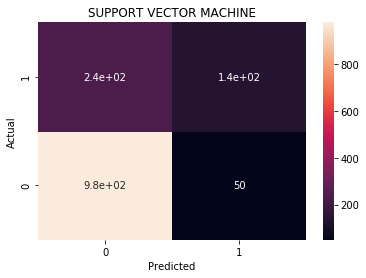

In [82]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred,rownames=['Actual'],colnames=['Predicted'])
ax = sn.heatmap(confusion_matrix,annot=True)
ax.set_ylim([0,2])
ax.set_title("SUPPORT VECTOR MACHINE")

In [29]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred, average='weighted')

(0.786696892651987, 0.7964285714285714, 0.7711454387273945, None)

In [30]:
print("support vector machine")
print(clf_ob.score(X_test, Y_test))

support vector machine
0.7964285714285714


ADABOOSTREGRESSOR

In [36]:
from sklearn.ensemble import AdaBoostRegressor
clf_ob4 = AdaBoostRegressor(random_state=0, n_estimators=100)
clf_ob4.fit(X_train, Y_train)
print("AdaBoostRegressor")
print(clf_ob4.score(X_test,Y_test))

AdaBoostRegressor
0.23174321137500897


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)

ADABOOST CLASSIFIER

In [37]:
from sklearn.ensemble import AdaBoostClassifier
clf_ob5 = AdaBoostClassifier(random_state=0, n_estimators=50)
clf_ob5.fit(X_train, Y_train)
y_pred1 = clf_ob5.predict(X_test)
print("Adaboostclassifier")
print(" ",metrics.accuracy_score(Y_test,y_pred1))
scores = cross_val_score(clf_ob5, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())
print("AdaBoostClassifier")
print(clf_ob5.score(X_test,Y_test))

C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboostclassifier
  0.8021428571428572


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

CROSS-V: 0.795255652171251
AdaBoostClassifier
0.8021428571428572


Text(0.5, 1, 'ADABOOST CLASSIFIER')

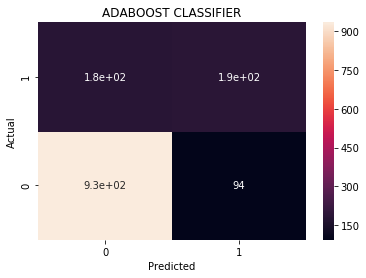

In [83]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred1,rownames=['Actual'],colnames=['Predicted'])
ax1 = sn.heatmap(confusion_matrix,annot=True)
ax1.set_ylim([0,2])
ax1.set_title("ADABOOST CLASSIFIER")

In [45]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred1, average='weighted')

(0.7914422736678843, 0.8021428571428572, 0.7928053829122531, None)

ADABOOST CLASSIFIER USING SVM

In [46]:
print("AdaBoostClassifier using svm")
clf_ob6 = AdaBoostClassifier(svm.SVC(probability=True,kernel='linear'),n_estimators=50,learning_rate=1.0, algorithm='SAMME')
clf_ob6.fit(X_train, Y_train)
y_pred2 = clf_ob6.predict(X_test)
print("Adaboostclassifier using svm")
print(" ",metrics.accuracy_score(Y_test,y_pred2))
scores = cross_val_score(clf_ob6, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())
print("AdaBoostClassifier using svm")
print(clf_ob6.score(X_test,Y_test))

AdaBoostClassifier using svm


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboostclassifier using svm
  0.7342857142857143


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

CROSS-V: 0.7348193065404625
AdaBoostClassifier using svm
0.7342857142857143


Text(0.5, 1, 'SUPPORT VECTOR MACHINE WITH ADABOOST')

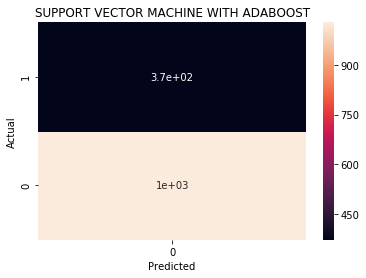

In [95]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred2,rownames=['Actual'],colnames=['Predicted'])
ax2 = sn.heatmap(confusion_matrix,annot=True)
ax2.set_ylim([0,2])
ax2.set_title("SUPPORT VECTOR MACHINE WITH ADABOOST")

In [50]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred2, average='weighted')

C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.5391755102040816, 0.7342857142857143, 0.6217839491645093, None)

In [51]:
print("AdaBoostClassifier using svm")
print(clf_ob6.score(X_test,Y_test))

AdaBoostClassifier using svm
0.7342857142857143


NAIVE BAYES CLASSIFIER

In [52]:
from sklearn.naive_bayes import GaussianNB
clf_ob1 = GaussianNB()
clf_ob1.fit(X_train, Y_train)
y_pred3 = clf_ob1.predict(X_test)
print("Adaboostclassifier using svm")
print(" ",metrics.accuracy_score(Y_test,y_pred3))
scores = cross_val_score(clf_ob1, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())
print("AdaBoostClassifier using svm")
print(clf_ob1.score(X_test,Y_test))
print("GaussianNB")
print(clf_ob1.score(X_test,Y_test))

Adaboostclassifier using svm
  0.7607142857142857
CROSS-V: 0.7586789065417162
AdaBoostClassifier using svm
0.7607142857142857
GaussianNB
0.7607142857142857


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Text(0.5, 1, 'NAIVE BAYES CLASSIFIER')

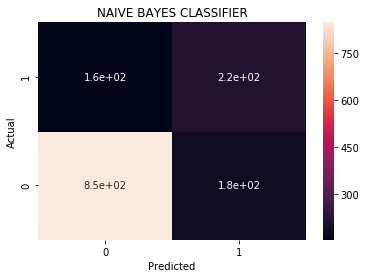

In [85]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred3,rownames=['Actual'],colnames=['Predicted'])
ax = sn.heatmap(confusion_matrix,annot=True)
ax.set_ylim([0,2])
ax.set_title("NAIVE BAYES CLASSIFIER")

In [54]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred3, average='weighted')

(0.7660511448741217, 0.7607142857142857, 0.7631311367103597, None)

Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf_ob2 = LogisticRegression(penalty='l2', tol=0.0001, C=1.0)
clf_ob2.fit(X_train, Y_train)
print("LogisticRegression")
print(clf_ob2.score(X_test,Y_test))
y_pred4 = clf_ob2.predict(X_test)
print("LOGISTIC REGRESSION")
print(" ",metrics.accuracy_score(Y_test,y_pred4))
scores = cross_val_score(clf_ob2, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())

LogisticRegression
0.7935714285714286
LOGISTIC REGRESSION
  0.7935714285714286
CROSS-V: 0.7885398334386905


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\linear_

Text(0.5, 1, 'LOGISTIC REGRESSION')

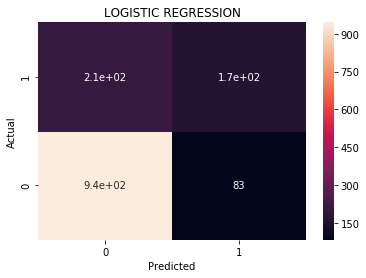

In [86]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred4,rownames=['Actual'],colnames=['Predicted'])
ax2 = sn.heatmap(confusion_matrix,annot=True)
ax2.set_ylim([0,2])
ax2.set_title("LOGISTIC REGRESSION")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred4, average='weighted')

DECISION TREES CLASSIFIER

In [57]:
clf_ob3 = DecisionTreeClassifier(max_depth=6, min_samples_split=2,random_state=0)
clf_ob3.fit(X_train, Y_train)
y_pred5 = clf_ob3.predict(X_test)
print("Decision trees")
print(" ",metrics.accuracy_score(Y_test,y_pred5))
scores = cross_val_score(clf_ob3, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())
print("DecisionTreeClassifier")
print(clf_ob3.score(X_test,Y_test))

Decision trees
  0.7914285714285715
CROSS-V: 0.7829659547202393
DecisionTreeClassifier
0.7914285714285715


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred5, average='weighted')

Text(0.5, 1, 'DECISION TREE CLASIFIER')

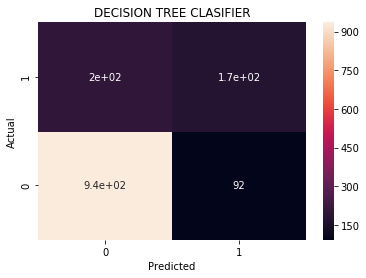

In [94]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred5,rownames=['Actual'],colnames=['Predicted'])
ax2 = sn.heatmap(confusion_matrix,annot=True)
ax2.set_ylim([0,2])
ax2.set_title("DECISION TREE CLASIFIER")

KNN

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.4, max_features=0.6)
bagging.fit(X_train,Y_train)
y_pred6 = bagging.predict(X_test)
print(" ",metrics.accuracy_score(Y_test,y_pred6))
scores = cross_val_score(bagging, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())
print("KNN")
print(bagging.score(X_test,Y_test))

C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

  0.7828571428571428
CROSS-V: 0.7818257510772783
KNN
0.7828571428571428


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred6, average='weighted')

Text(0.5, 1, 'KNN')

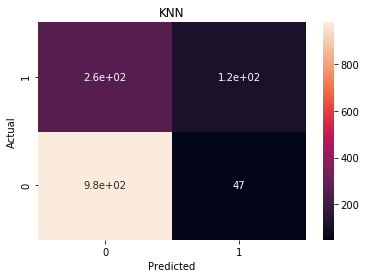

In [88]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred6,rownames=['Actual'],colnames=['Predicted'])
ax2 = sn.heatmap(confusion_matrix,annot=True)
ax2.set_ylim([0,2])
ax2.set_title("KNN")

RANDOM FOREST CLASSIFIER

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
clf_ob8 = RandomForestClassifier(n_estimators=10, max_depth=6,min_samples_split=2, random_state=0)
clf_ob8.fit(X_train,Y_train)
y_pred7 = clf_ob8.predict(X_test)
print(" ",metrics.accuracy_score(Y_test,y_pred7))
scores = cross_val_score(clf_ob8, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())
print("RandomForestClassifier")
print(clf_ob8.score(X_test,Y_test))

  0.7957142857142857
CROSS-V: 0.7928267746929609
RandomForestClassifier
0.7957142857142857


C:\Users\Praty\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [63]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred7, average='weighted')

(0.7851740045023434, 0.7957142857142857, 0.7874850402685455, None)

Text(0.5, 1, 'RANDOM FOREST CLASSIFIER')

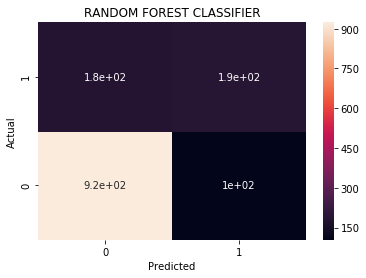

In [89]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred7,rownames=['Actual'],colnames=['Predicted'])
ax2 = sn.heatmap(confusion_matrix,annot=True)
ax2.set_ylim([0,2])
ax2.set_title("RANDOM FOREST CLASSIFIER")

EXTRA TREES CLASSIFIER

In [64]:
clf_ob9 = ExtraTreesClassifier(n_estimators=10, max_depth=6,min_samples_split=2, random_state=0)
clf_ob9.fit(X_train,Y_train)
y_pred8 = clf_ob9.predict(X_test)
print(" ",metrics.accuracy_score(Y_test,y_pred8))
print("ExtreaTreesClassifier")
print(clf_ob9.score(X_test,Y_test))
scores = cross_val_score(clf_ob9, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())

  0.7907142857142857
ExtreaTreesClassifier
0.7907142857142857
CROSS-V: 0.7911125905093392


C:\Users\Praty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Text(0.5, 1, 'EXTRA TREES CLASSIFIER')

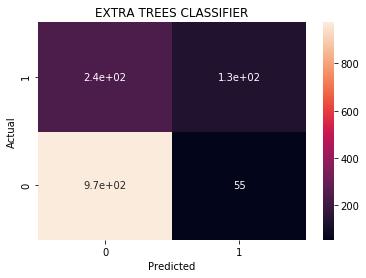

In [90]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred8,rownames=['Actual'],colnames=['Predicted'])
ax2 = sn.heatmap(confusion_matrix,annot=True)
ax2.set_ylim([0,2])
ax2.set_title("EXTRA TREES CLASSIFIER")

In [66]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred8, average='weighted')

(0.7783652497607906, 0.7907142857142857, 0.7651322158649485, None)

RANDOM FOREST USING ADABOOST

In [71]:
clf1 = AdaBoostClassifier(RandomForestClassifier(max_depth=1),n_estimators=50)
clf1.fit(X_train,Y_train)
y_pred9 = clf1.predict(X_test)
print(" ",metrics.accuracy_score(Y_test,y_pred9))
print("AdaBoostClassifier using RandomForest")
print(clf1.score(X_test,Y_test))
scores = cross_val_score(clf1, x_features, y_features, cv=10)
print("CROSS-V:",scores.mean())

C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages

  0.8042857142857143
AdaBoostClassifier using RandomForest
0.8042857142857143


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages

CROSS-V: 0.7928241970173117


In [69]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred9, average='weighted')

(0.793038566471, 0.8035714285714286, 0.7943013729273272, None)

Text(0.5, 1, 'RANDOM FOREST WITH ADABOOST')

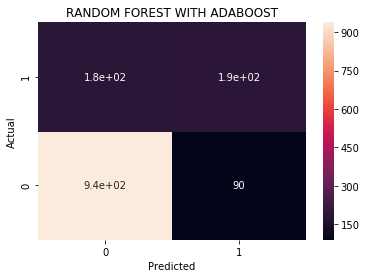

In [93]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred9,rownames=['Actual'],colnames=['Predicted'])
ax2 = sn.heatmap(confusion_matrix,annot=True)
ax2.set_ylim([0,2])
ax2.set_title("RANDOM FOREST WITH ADABOOST")

DECISION TREE USING ADABOOST

In [72]:
clf2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=50)
clf2.fit(X_train,Y_train)
y_pred10 = clf2.predict(X_test)
print(" ",metrics.accuracy_score(Y_test,y_pred10))
print("AdaBoostClassifier using DecisionTreeClasifier")
print(clf2.score(X_test,Y_test))
scores = cross_val_score(clf2, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())

C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  0.8021428571428572
AdaBoostClassifier using DecisionTreeClasifier
0.8021428571428572


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

CROSS-V: 0.795255652171251


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred10, average='weighted')

Text(0.5, 1, 'DECISION TREES WITH ADABOOST')

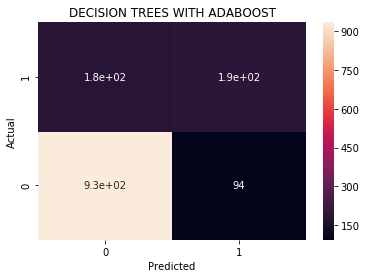

In [92]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred10,rownames=['Actual'],colnames=['Predicted'])
ax2 = sn.heatmap(confusion_matrix,annot=True)
ax2.set_ylim([0,2])
ax2.set_title("DECISION TREES WITH ADABOOST")

ADABOOST USING EXTRATREES CLASSIFIER

In [74]:
clf3 = AdaBoostClassifier(ExtraTreesClassifier(max_depth=1),n_estimators=100)
clf3.fit(X_train,Y_train)
y_pred11 = clf3.predict(X_test)
print(" ",metrics.accuracy_score(Y_test,y_pred11))
print("AdaBoostClassifier using ExtraTreeClasifier")
print(clf3.score(X_test,Y_test))
scores = cross_val_score(clf3, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())

C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages

  0.8
AdaBoostClassifier using ExtraTreeClasifier
0.8


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praty\Anaconda3\lib\site-packages

CROSS-V: 0.7955397345319345


In [76]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred11, average='weighted')

(0.7891160583573124, 0.8, 0.7906898434655989, None)

Text(0.5, 1, 'EXTRA TREE CLASSIFIER WITH ADABOOST')

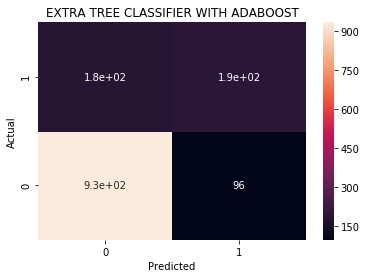

In [96]:
confusion_matrix=pd.crosstab(Y_test.ravel(),y_pred11,rownames=['Actual'],colnames=['Predicted'])
ax2 = sn.heatmap(confusion_matrix,annot=True)
ax2.set_ylim([0,2])
ax2.set_title("EXTRA TREE CLASSIFIER WITH ADABOOST")

In [77]:
import sklearn.metrics as metrics
clf_ob9 = ExtraTreesClassifier(n_estimators=10, max_depth=6,min_samples_split=2, random_state=0)
clf_ob9.fit(X_train,Y_train)
y_pred12 = clf_ob9.predict(X_test)
print("ExtreaTreesClassifier")
print(" ",metrics.accuracy_score(Y_test,y_pred12))
scores = cross_val_score(clf_ob9, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())

ExtreaTreesClassifier
  0.7907142857142857
CROSS-V: 0.7911125905093392


C:\Users\Praty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A col

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred12, average='weighted')

XGBOOST

In [80]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, Y_train)
y_pred13 = model.predict(X_test)
print("XGBOOST")
print(" ",metrics.accuracy_score(Y_test,y_pred13))
scores = cross_val_score(model, x_features, y_features, cv=5)
print("CROSS-V:",scores.mean())
model.score(X_test,Y_test)

C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBOOST
  0.7985714285714286


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CROSS-V: 0.7878250383218125


0.7985714285714286